## Lab 9 Part 2: Object Detection with YOLOv8

You do not need GPU to run this notebook, since we will use an existing model and not train it.

Before you start, load the ```images.zip``` file into Google Colab (by uploading it to the ```files``` section).

In [7]:
!unzip "./images.zip" -d "./data"

Archive:  ./images.zip
   creating: ./data/images/
  inflating: ./data/images/image1.jpg  
  inflating: ./data/images/image2.jpg  
  inflating: ./data/images/image3.jpg  
  inflating: ./data/images/image4.jpg  
  inflating: ./data/images/image5.jpg  


There are many different versions of YOLO available. We will be using YOLOv8.

YOLOv8 was originally proposed and implemented by Ultralytics. To work with the model, we will use the ```ultralytics``` package.

Note that this package contains implementations of various models. [Click here](https://docs.ultralytics.com/models/) to find out which models are available on ```ultralytics```.

In [8]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.1.1+cu121 CPU (Intel Core(TM) i5-1035G1 1.00GHz)
Setup complete ✅ (8 CPUs, 7.6 GB RAM, 88.3/92.9 GB disk)


In [9]:
import os
import matplotlib.pyplot as plt

### Load model

YOLOv8 comes in different versions. [Click here](https://docs.ultralytics.com/models/yolov8/) to see available versions and their computational efficiency and predictive performance on the datasets they were trained.

In [10]:
from ultralytics import YOLO

# Load a pretrained model
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:06<00:00, 3.34MB/s]


Create folder to save the results

In [11]:
folder_name = "results"
os.mkdir(folder_name)

### Inference

To apply the model to predict bounding boxes on images, we can use the ```predict()``` function. This function can receive many different inputs, including an image loaded with cv2, the path to an image and even a path to the folder that loads the images. [Click here](https://docs.ultralytics.com/modes/predict/) for more information about the inference process using YOLOv8.

We will provide the path to the folder as input to obtain predictions for all the images.

In [15]:
input_image_folder = './data/images/'

# Predict bounding boxes for the images
results = model.predict(input_image_folder)

for result in results:
    # Get bounding boxes object for bounding box outputs
    boxes = result.boxes
    # Save image with bounding boxes and predictions to folder
    image_name = result.path.split(os.sep)[-1]
    result.save(filename=os.path.join(folder_name, image_name))

# Uncomment to visualize the attributes that a bounding box contains
# print(boxes[0])


image 1/5 /home/rubis/VC/labs/09-segmentation-and-object-detection/data/images/image1.jpg: 448x640 10 persons, 3 cars, 236.2ms
image 2/5 /home/rubis/VC/labs/09-segmentation-and-object-detection/data/images/image2.jpg: 448x640 7 persons, 157.2ms
image 3/5 /home/rubis/VC/labs/09-segmentation-and-object-detection/data/images/image3.jpg: 480x640 29 persons, 1 bicycle, 273.6ms
image 4/5 /home/rubis/VC/labs/09-segmentation-and-object-detection/data/images/image4.jpg: 480x640 5 persons, 1 car, 3 buss, 1 bench, 167.3ms
image 5/5 /home/rubis/VC/labs/09-segmentation-and-object-detection/data/images/image5.jpg: 448x640 8 cars, 1 train, 1 truck, 1 stop sign, 158.2ms
Speed: 3.2ms preprocess, 198.5ms inference, 250.5ms postprocess per image at shape (1, 3, 448, 640)


Visualize results

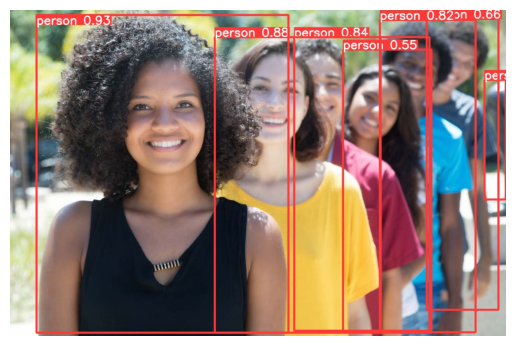

In [16]:
img = plt.imread(os.path.join(folder_name, "image2.jpg"))
plt.axis('off')
plt.imshow(img)

### Altering Parameters: Confidence Threshold and Non Maximum Suppression

**Exercise 1**: Increase/decrease the **confidence threshold** and compare the results.

When you increase/decrease the threshold, how does the number of detected objects change? And why?

In [17]:
folder_name = "results_cnf"
os.mkdir(folder_name)

In [25]:
# Predict bounding boxes for the images
results = model.predict(input_image_folder, conf=0.7)

for result in results:
    # Get bounding boxes object for bounding box outputs
    boxes = result.boxes
    # Save image with bounding boxes and predictions to folder
    image_name = result.path.split(os.sep)[-1]
    result.save(filename=os.path.join(folder_name, image_name))


image 1/5 /home/rubis/VC/labs/09-segmentation-and-object-detection/data/images/image1.jpg: 448x640 1 car, 280.6ms
image 2/5 /home/rubis/VC/labs/09-segmentation-and-object-detection/data/images/image2.jpg: 448x640 4 persons, 212.8ms
image 3/5 /home/rubis/VC/labs/09-segmentation-and-object-detection/data/images/image3.jpg: 480x640 (no detections), 220.0ms
image 4/5 /home/rubis/VC/labs/09-segmentation-and-object-detection/data/images/image4.jpg: 480x640 2 persons, 1 bus, 220.7ms
image 5/5 /home/rubis/VC/labs/09-segmentation-and-object-detection/data/images/image5.jpg: 448x640 1 car, 1 stop sign, 213.0ms
Speed: 2.5ms preprocess, 229.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


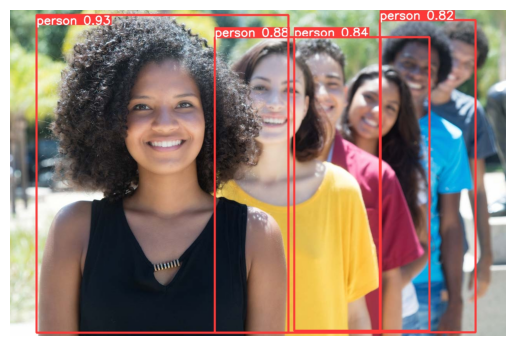

In [26]:
img = plt.imread(os.path.join(folder_name, "image2.jpg"))
plt.axis('off')
plt.imshow(img)

**Exercise 2**: Increase/decrease the Non Maximum Suppression (NMS) threshold and compare the results.

When you increase/decrease the threshold, how does the number of detected objects change? And why?

In [27]:
folder_name = "results_iou"
os.mkdir(folder_name)

In [28]:
# Predict bounding boxes for the images
results = model.predict(input_image_folder, iou=0.5)

for result in results:
    # Get bounding boxes object for bounding box outputs
    boxes = result.boxes
    # Save image with bounding boxes and predictions to folder
    image_name = result.path.split(os.sep)[-1]
    result.save(filename=os.path.join(folder_name, image_name))


image 1/5 /home/rubis/VC/labs/09-segmentation-and-object-detection/data/images/image1.jpg: 448x640 10 persons, 3 cars, 192.6ms
image 2/5 /home/rubis/VC/labs/09-segmentation-and-object-detection/data/images/image2.jpg: 448x640 6 persons, 165.6ms
image 3/5 /home/rubis/VC/labs/09-segmentation-and-object-detection/data/images/image3.jpg: 480x640 29 persons, 1 bicycle, 189.8ms
image 4/5 /home/rubis/VC/labs/09-segmentation-and-object-detection/data/images/image4.jpg: 480x640 5 persons, 1 car, 3 buss, 1 bench, 221.1ms
image 5/5 /home/rubis/VC/labs/09-segmentation-and-object-detection/data/images/image5.jpg: 448x640 7 cars, 1 train, 1 truck, 1 stop sign, 154.2ms
Speed: 3.1ms preprocess, 184.6ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


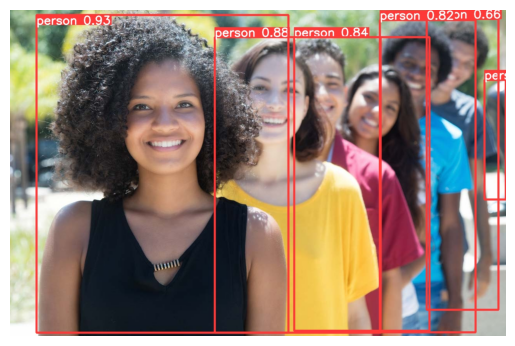

In [29]:
img = plt.imread(os.path.join(folder_name, "image2.jpg"))
plt.axis('off')
plt.imshow(img)

For more information on how to train a YOLOv8 model, [click here](https://docs.ultralytics.com/modes/train/).


image 1/1 /home/rubis/VC/labs/09-segmentation-and-object-detection/../../VC_proj/samples/IMG_20201127_002957.jpg: 640x480 1 clock, 194.9ms
Speed: 3.8ms preprocess, 194.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


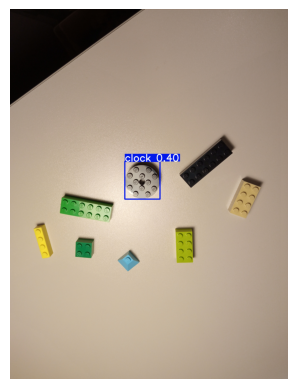

In [35]:
# Brincadeirinha

folder_name = "playground"
os.mkdir(folder_name)

# Predict bounding boxes for the images
image_path = '../../VC_proj/samples/IMG_20201127_002957.jpg'

results = model.predict(image_path)

for result in results:
    # Get bounding boxes object for bounding box outputs
    boxes = result.boxes
    # Save image with bounding boxes and predictions to folder
    image_name = result.path.split(os.sep)[-1]
    result.save(filename=os.path.join(folder_name, image_name))

img = plt.imread(os.path.join(folder_name, "IMG_20201127_002957.jpg"))
plt.axis('off')
plt.imshow(img)